### Packages

In [1]:
### Packages
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.ticker as mticker
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.feature_selection import SequentialFeatureSelector

In [2]:
import warnings
warnings.filterwarnings('ignore')

### 그래프에 한글 표시를 위한 글꼴 설정
plt.rcParams['font.family'] = 'Gulim'

### 스타일
plt.style.use('ggplot')

In [17]:
# 한글깨짐 현상
plt.rcParams['font.family'] = 'NanumGothic'

### 자료 읽기

In [3]:
### Read data
data_raw = pd.read_csv('../0.data/loan_customer.csv')

In [4]:
### Print data
data_raw

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,...,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,CB_SCORE_1,CB_SCORE_2,CB_SCORE_3,TARGET
0,100002,Cash loans,M,Y,0,202500.0,NaN,Working,Secondary / secondary special,Single / not married,...,0,0,Business Entity Type 3,0,1,0,NaN,NaN,58.349224,1
1,100004,Revolving loans,NaN,NaN,0,67500.0,135000.0,Working,Secondary / secondary special,Single / not married,...,0,0,Government,0,0,0,26.499494,57.600542,46.433666,0
2,100020,Cash loans,M,N,0,108000.0,509602.5,Working,Secondary / secondary special,Married,...,1,0,Government,0,1,0,NaN,63.496369,NaN,0
3,100029,Cash loans,M,N,2,135000.0,NaN,Working,Secondary / secondary special,Married,...,1,1,Business Entity Type 3,0,1,0,82.376245,45.996152,68.694333,0
4,100048,Cash loans,NaN,Y,0,202500.0,604152.0,Working,Secondary / secondary special,Married,...,1,1,Industry: type 1,0,1,0,66.199985,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23995,456095,Cash loans,NaN,NaN,0,135000.0,NaN,Pensioner,Higher education,Married,...,0,0,XNA,0,1,0,55.568876,64.318198,56.609319,0
23996,456117,Cash loans,NaN,N,1,67500.0,490536.0,Working,Secondary / secondary special,Married,...,0,0,Business Entity Type 3,0,1,0,79.804871,NaN,51.115667,0
23997,456118,Cash loans,M,Y,0,135000.0,995643.0,Working,Higher education,Married,...,0,0,Business Entity Type 3,0,1,0,40.231662,NaN,51.533905,0
23998,456142,Cash loans,NaN,NaN,1,360000.0,1417185.0,Working,Higher education,Single / not married,...,1,1,School,0,1,0,50.734878,NaN,59.707773,0


In [5]:
### Data summary
data_raw.describe(include="all")

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,...,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,CB_SCORE_1,CB_SCORE_2,CB_SCORE_3,TARGET
count,24000.000000,24000,16906,14429,24000.000000,2.400000e+04,1.670000e+04,24000,24000,24000,...,24000.000000,24000.000000,24000,24000.000000,24000.000000,24000.000000,17854.000000,15726.000000,16892.000000,24000.000000
unique,NaN,2,3,2,NaN,NaN,NaN,7,5,6,...,NaN,NaN,58,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Cash loans,F,Y,NaN,NaN,NaN,Working,Secondary / secondary special,Married,...,NaN,NaN,Business Entity Type 3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,21733,11211,9939,NaN,NaN,NaN,12460,17054,15275,...,NaN,NaN,5311,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,277994.337708,NaN,NaN,NaN,0.418083,1.725182e+05,5.954254e+05,NaN,NaN,NaN,...,0.232042,0.181750,NaN,0.000167,0.709292,0.000125,49.942357,58.061950,60.368432,0.083042
std,102778.811383,NaN,NaN,NaN,0.727194,7.604604e+05,3.988125e+05,NaN,NaN,NaN,...,0.422144,0.385646,NaN,0.012909,0.454099,0.011180,13.095990,10.752802,8.682502,0.275951
min,100002.000000,NaN,NaN,NaN,0.000000,2.700000e+04,4.500000e+04,NaN,NaN,NaN,...,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,28.967147,0.000000
25%,188705.250000,NaN,NaN,NaN,0.000000,1.125000e+05,2.700000e+05,NaN,NaN,NaN,...,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,41.026337,50.801249,54.410659,0.000000
50%,277908.500000,NaN,NaN,NaN,0.000000,1.440000e+05,5.108535e+05,NaN,NaN,NaN,...,0.000000,0.000000,NaN,0.000000,1.000000,0.000000,49.894802,57.935604,59.971539,0.000000
75%,366537.250000,NaN,NaN,NaN,1.000000,2.025000e+05,8.086500e+05,NaN,NaN,NaN,...,0.000000,0.000000,NaN,0.000000,1.000000,0.000000,58.919900,65.184718,66.097419,0.000000


In [6]:
### 변수이름
data_raw.columns

Index(['SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_REALTY',
       'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE',
       'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', 'REGION_RATING_CLIENT',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'FLAG_DOCUMENT_2',
       'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'CB_SCORE_1', 'CB_SCORE_2',
       'CB_SCORE_3', 'TARGET'],
      dtype='object')

In [7]:
### Data types
data_raw.dtypes

SK_ID_CURR                      int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_REALTY                object
CNT_CHILDREN                    int64
AMT_INCOME_TOTAL              float64
AMT_CREDIT                    float64
NAME_INCOME_TYPE               object
NAME_EDUCATION_TYPE            object
NAME_FAMILY_STATUS             object
NAME_HOUSING_TYPE              object
REGION_POPULATION_RELATIVE    float64
DAYS_BIRTH                    float64
DAYS_EMPLOYED                 float64
DAYS_REGISTRATION             float64
DAYS_ID_PUBLISH               float64
FLAG_MOBIL                      int64
FLAG_EMP_PHONE                  int64
FLAG_WORK_PHONE                 int64
FLAG_PHONE                      int64
FLAG_EMAIL                      int64
REGION_RATING_CLIENT            int64
WEEKDAY_APPR_PROCESS_START     object
HOUR_APPR_PROCESS_START         int64
REG_CITY_NOT_LIVE_CITY          int64
REG_CITY_NOT_WORK_CITY          int64
LIVE_CITY_NO

---

In [8]:
### 데이터 전처리
def fn_data_preprocessing(data):
    df = data.copy()
    
    ### 출력변수
    out_columns = ["NAME_CONTRACT_TYPE",
                   #"FLAG_MOBIL",                # 모두 1 → 제외
                   #"FLAG_EMP_PHONE",
                   "FLAG_WORK_PHONE",
                   #"FLAG_PHONE",
                   "FLAG_EMAIL",
                   "REGION_RATING_CLIENT",
                   "REG_CITY_NOT_LIVE_CITY",
                   "REG_CITY_NOT_WORK_CITY",
                   "LIVE_CITY_NOT_WORK_CITY",
                   "FLAG_DOCUMENT_3",
                   "TARGET",
                   "age_cat",
                   #"gender_cat",
                   #"OWN_REALTY_cat",
                   #"CNT_CHILDREN_cat",
                   "INCOME_cat",
                   "INCOME_TYPE_cat",
                   "EDUCATION_TYPE_cat",
                   "FAMILY_STATUS_cat",
                   "HOUSING_TYPE_cat",
                   "EMPLOYED_cat",
                   #"REGISTRATION_cat",
                   "ID_PUBLISH_cat",
                   #"HOUR_APPR_cat",
                   "CB_SCORE1_cat",
                   #"CB_SCORE3_cat",
                   #"CB_SCORE2_cat",
                   #"WEEKDAY_cat"
                  ]

    ### 나이구분
    df['age_cat'] = 0
    df['age_cat'] = pd.cut(-df['DAYS_BIRTH'], 
                                 bins=[0, 10950, 14600, 18250, 21900, 25550], 
                                 labels=['1', '2', '3', '4', '5'])
    df['age_cat'] = df['age_cat'].replace('3', '2').replace('4', '3').replace('5', '3').replace('4', '3')
    df['age_cat'] = df['age_cat'].values.add_categories('4')
    df['age_cat'] = df['age_cat'].fillna('4').astype('int')

    ### 성별: 문자 > 숫자
    #df['gender_cat'] = df.CODE_GENDER.replace('M', 0).replace('F', 1).replace('XNA', 9)
    #df['gender_cat'] = df['gender_cat'].fillna(9)
    df['gender_cat'] = df.CODE_GENDER.fillna('XNA')

    ### 자가보유: 문자 > 숫자
    #df['OWN_REALTY_cat'] = df.FLAG_OWN_REALTY.replace('N', 0).replace('Y', 1)
    df['OWN_REALTY_cat'] = df.FLAG_OWN_REALTY.fillna("XNA")

    ### 자녀구분 - CNT_CHILDREN
    df['CNT_CHILDREN_cat'] = 0
    df['CNT_CHILDREN_cat'] = pd.cut(df['CNT_CHILDREN'], 
                                 bins=[-1, 0, 1, 2, 99], 
                                 labels=['0', '1', '2', '3'])

    ### 소득금액구간 - AMT_INCOME_TOTAL
    df['INCOME_cat'] = 0
    df['INCOME_cat'] = pd.cut(df['AMT_INCOME_TOTAL'], 
                                 bins=[-1, 150000, 230000, 9999999999], 
                                 labels=['0', '1', '2'])

    ### 소득유형: 문자 > 숫자 NAME_INCOME_TYPE
    df['INCOME_TYPE_cat'] = df.NAME_INCOME_TYPE.replace('Pensioner', '0').replace('Businessman', '1').replace('State servant', '1').replace('Commercial associate', '2').replace('Maternity leave', '3').replace('Student', '3').replace('Working', '3')

    ### 학력: 문자 > 숫자 NAME_EDUCATION_TYPE
    df['EDUCATION_TYPE_cat'] = df.NAME_EDUCATION_TYPE.replace('Academic degree', '0').replace('Higher education', '0').replace('Incomplete higher', '1').replace('Secondary / secondary special', '2').replace('Lower secondary', '2')

    ### 결혼여부: 문자 > 숫자 NAME_FAMILY_STATUS
    df['FAMILY_STATUS_cat'] = df.NAME_FAMILY_STATUS.replace('Married', '0').replace('Single / not married', '1').replace('Separated', '1').replace('Civil marriage', '1').replace('Widow', '1').replace('Unknown', '1')

    ### 주거형태: 문자 > 숫자 NAME_HOUSING_TYPE
    df['HOUSING_TYPE_cat'] = df.NAME_HOUSING_TYPE.replace('House / apartment', '0').replace('Municipal apartment', '1').replace('With parents', '1').replace('Rented apartment', '1').replace('Co-op apartment', '1').replace('Office apartment', '1')

    ### 근무년수 - DAYS_EMPLOYED
    df['EMPLOYED_cat'] = 0
    df['EMPLOYED_cat'] = pd.cut(-df['DAYS_EMPLOYED'], 
                                 bins=[0, 365, 1095, 1825,9999999999], 
                                 labels=['0', '1', '2','3'])
    df['EMPLOYED_cat'] = df['EMPLOYED_cat'].fillna('1')

    ### 등록정보변경 - DAYS_REGISTRATION
    df['REGISTRATION_cat'] = 0
    df['REGISTRATION_cat'] = pd.cut(-df['DAYS_REGISTRATION'], 
                                 bins=[0, 365, 1095,9999999999], 
                                 labels=['0', '1', '2'])
    df['REGISTRATION_cat'] = df['REGISTRATION_cat'].fillna('2')

    ### 신분증변경 - DAYS_ID_PUBLISH
    df['ID_PUBLISH_cat'] = 0
    df['ID_PUBLISH_cat'] = pd.cut(-df['DAYS_ID_PUBLISH'], 
                                 bins=[0, 1095, 1825,9999999999], 
                                 labels=['0', '1', '2'])
    df['ID_PUBLISH_cat'] = df['ID_PUBLISH_cat'].fillna('2')

    ### 요일: 문자 > 숫자 WEEKDAY_APPR_PROCESS_START
    df['WEEKDAY_cat'] = df.WEEKDAY_APPR_PROCESS_START.replace('MONDAY', '0').replace('TUESDAY', '1').replace('WEDNESDAY', '1').replace('THURSDAY', '1').replace('FRIDAY', '1').replace('SATURDAY', '1').replace('SUNDAY', '1')

    ### 신청시간 - HOUR_APPR_PROCESS_START
    df['HOUR_APPR_cat'] = 0
    df['HOUR_APPR_cat'] = pd.cut(df['HOUR_APPR_PROCESS_START'], 
                                 bins=[-1, 7, 22, 24], 
                                 labels=['3', '1', '2']).replace('3', '2')

    ### CB_SCORE_1 - CB_SCORE_1
    df['CB_SCORE1_cat'] = 0
    df['CB_SCORE1_cat'] = pd.cut(df['CB_SCORE_1'], 
                                 bins=[0, 10, 20, 30, 40, 50 ,60 ,70 ,80 ,90 ,100], 
                                 labels=['1', '2', '3', '4', '5', '6', '7', '8', '9', '10'])
    #df['CB_SCORE1_cat'] = df['CB_SCORE1_cat'].values.add_categories('11')
    df['CB_SCORE1_cat'] = df['CB_SCORE1_cat'].fillna('6').astype('int')

    ### CB_SCORE_2 - CB_SCORE_2
    df['CB_SCORE2_cat'] = 0
    df['CB_SCORE2_cat'] = pd.cut(df['CB_SCORE_2'], 
                                 bins=[0, 10, 20, 30, 40, 50 ,60 ,70 ,80 ,90 ,100], 
                                 labels=['1', '2', '3', '4', '5', '6', '7', '8', '9', '10'])
    #df['CB_SCORE2_cat'] = df['CB_SCORE2_cat'].values.add_categories('11')
    df['CB_SCORE2_cat'] = df['CB_SCORE2_cat'].fillna('6').astype('int')

    ### CB_SCORE_3 - CB_SCORE_3
    df['CB_SCORE3_cat'] = 0
    df['CB_SCORE3_cat'] = pd.cut(df['CB_SCORE_3'], 
                                 bins=[0, 10, 20, 30, 40, 50 ,60 ,70 ,80 ,90 ,100], 
                                 labels=['1', '2', '3', '4', '5', '6', '7', '8', '9', '10'])
    #df['CB_SCORE3_cat'] = df['CB_SCORE3_cat'].values.add_categories('11')
    df['CB_SCORE3_cat'] = df['CB_SCORE3_cat'].fillna('6').astype('int')

    return df.loc[:, out_columns].dropna()

In [9]:
### 분석 자료
data_target = fn_data_preprocessing(data_raw)
data_target

,NAME_CONTRACT_TYPE,FLAG_WORK_PHONE,FLAG_EMAIL,REGION_RATING_CLIENT,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,FLAG_DOCUMENT_3,TARGET,age_cat,INCOME_cat,INCOME_TYPE_cat,EDUCATION_TYPE_cat,FAMILY_STATUS_cat,HOUSING_TYPE_cat,EMPLOYED_cat,ID_PUBLISH_cat,CB_SCORE1_cat
0,Cash loans,0,0,2,0,0,0,1,1,1,1,3,2,1,0,1,2,6
1,Revolving loans,1,0,2,0,0,0,0,0,3,0,3,2,1,0,1,2,3
2,Cash loans,0,0,2,1,1,0,1,0,2,0,3,2,0,0,1,2,6
3,Cash loans,0,0,2,0,1,1,1,0,2,0,3,2,0,0,1,2,9
4,Cash loans,0,0,2,0,1,1,1,0,4,1,3,2,0,0,1,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23995,Cash loans,0,0,2,0,0,0,1,0,3,0,0,0,0,0,1,2,6
23996,Cash loans,1,0,2,0,0,0,1,0,2,0,3,2,0,0,1,2,8
23997,Cash loans,0,0,2,0,0,0,1,0,4,0,3,0,0,0,1,2,5
23998,Cash loans,1,0,3,0,1,1,1,0,2,2,3,0,1,0,1,2,6


In [10]:
data_target.dtypes

NAME_CONTRACT_TYPE           object
FLAG_WORK_PHONE               int64
FLAG_EMAIL                    int64
REGION_RATING_CLIENT          int64
REG_CITY_NOT_LIVE_CITY        int64
REG_CITY_NOT_WORK_CITY        int64
LIVE_CITY_NOT_WORK_CITY       int64
FLAG_DOCUMENT_3               int64
TARGET                        int64
age_cat                       int64
INCOME_cat                 category
INCOME_TYPE_cat              object
EDUCATION_TYPE_cat           object
FAMILY_STATUS_cat            object
HOUSING_TYPE_cat             object
EMPLOYED_cat               category
ID_PUBLISH_cat             category
CB_SCORE1_cat                 int64
dtype: object

In [11]:
data_target.describe(include='all')

,NAME_CONTRACT_TYPE,FLAG_WORK_PHONE,FLAG_EMAIL,REGION_RATING_CLIENT,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,FLAG_DOCUMENT_3,TARGET,age_cat,INCOME_cat,INCOME_TYPE_cat,EDUCATION_TYPE_cat,FAMILY_STATUS_cat,HOUSING_TYPE_cat,EMPLOYED_cat,ID_PUBLISH_cat,CB_SCORE1_cat
count,24000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000,24000,24000,24000,24000,24000,24000,24000.000000
unique,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,4,3,2,2,4,3,NaN
top,Cash loans,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,3,2,0,0,1,2,NaN
freq,21733,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12214,12464,17332,15275,21213,13582,18850,NaN
mean,NaN,0.203667,0.055250,2.051833,0.076583,0.232042,0.181750,0.709292,0.083042,2.546792,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.625125
std,NaN,0.402732,0.228472,0.511525,0.265935,0.422144,0.385646,0.454099,0.275951,0.938978,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.176287
min,NaN,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000
25%,NaN,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
50%,NaN,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.000000
75%,NaN,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.000000


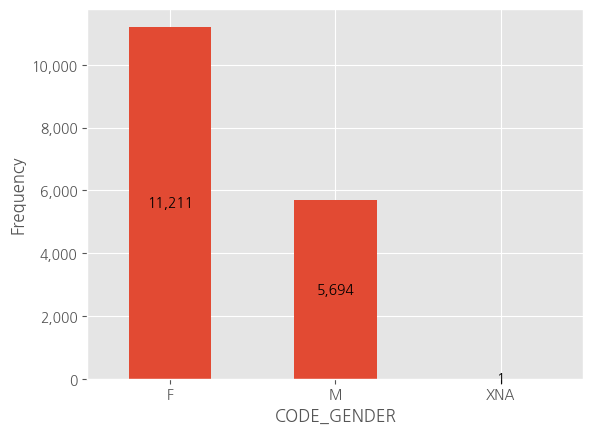

In [18]:
### TARGET
tb = pd.crosstab(data_raw.CODE_GENDER, 'Freq', colnames=[''])
ax = tb.plot.bar(rot=0)
ax.bar_label(ax.containers[0], fmt='{:,.0f}', label_type='center')
ax.set_xlabel("CODE_GENDER")
ax.set_ylabel("Frequency")
ax.yaxis.set_major_formatter(mticker.FuncFormatter('{:,.0f}'.format))
ax.legend().remove()

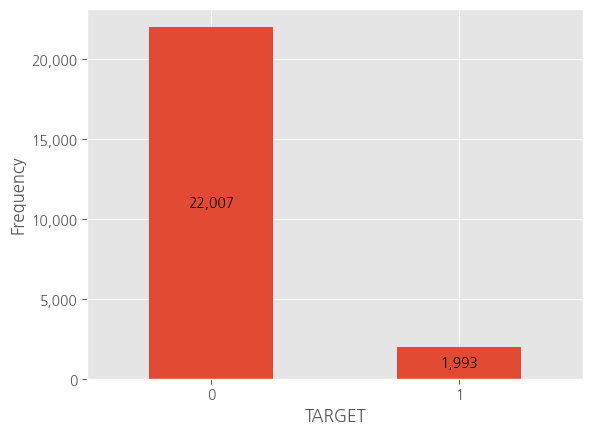

In [19]:
### TARGET
tb = pd.crosstab(data_target.TARGET, 'Freq', colnames=[''])
ax = tb.plot.bar(rot=0)
ax.bar_label(ax.containers[0], fmt='{:,.0f}', label_type='center')
ax.set_xlabel("TARGET")
ax.set_ylabel("Frequency")
ax.yaxis.set_major_formatter(mticker.FuncFormatter('{:,.0f}'.format))
ax.legend().remove()

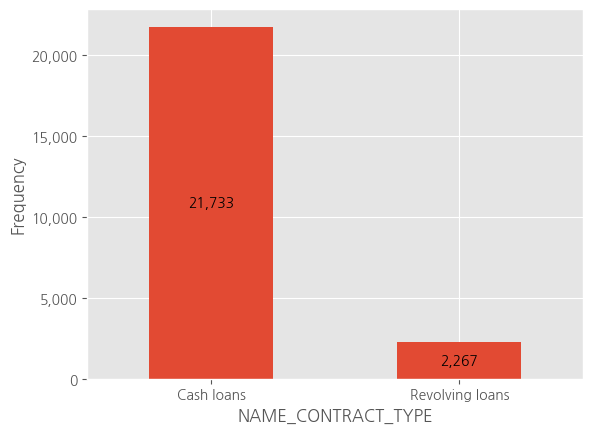

In [20]:
### NAME_CONTRACT_TYPE
tb = pd.crosstab(data_target.NAME_CONTRACT_TYPE, 'Freq', colnames=[''])
ax = tb.plot.bar(rot=0)
ax.bar_label(ax.containers[0], fmt='{:,.0f}', label_type='center')
ax.set_xlabel("NAME_CONTRACT_TYPE")
ax.set_ylabel("Frequency")
ax.yaxis.set_major_formatter(mticker.FuncFormatter('{:,.0f}'.format))
ax.legend().remove()

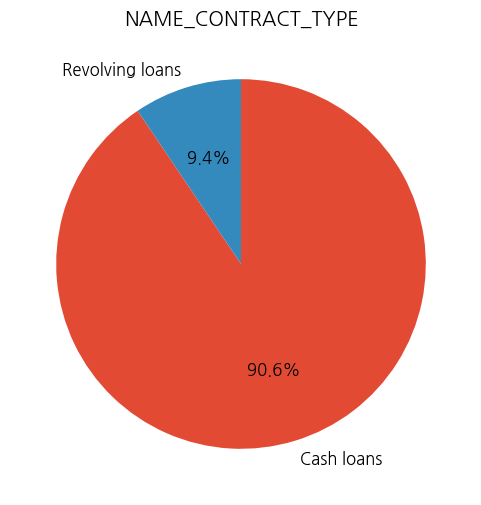

In [21]:
### NAME_CONTRACT_TYPE
tb_sort_asc = tb.sort_values('Freq', ascending=False)
ax = tb_sort_asc.plot.pie(y = 'Freq', figsize = (6, 6), fontsize = 12, 
                          startangle=90, counterclock = False,
                          autopct = '%.1f%%')
ax.set_title("NAME_CONTRACT_TYPE")
ax.legend().remove()
ax.set_ylabel("")
plt.show()

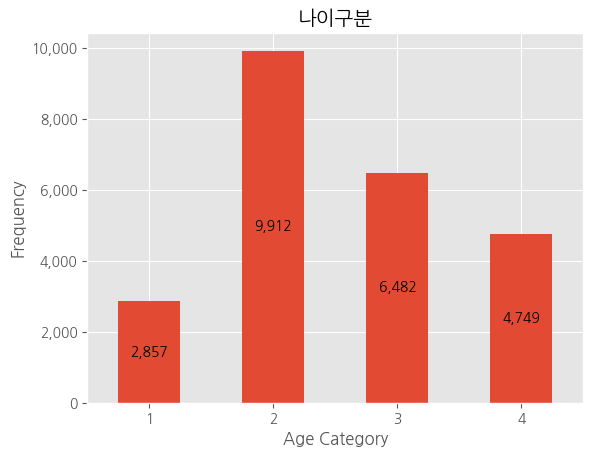

In [22]:
### 나이구분
tb = pd.crosstab(data_target.age_cat, 'Freq', colnames=[''])
ax = tb.plot.bar(rot=0)
ax.bar_label(ax.containers[0], fmt='{:,.0f}', label_type='center')
ax.set_title("나이구분")
ax.set_xlabel("Age Category")
ax.set_ylabel("Frequency")
ax.yaxis.set_major_formatter(mticker.FuncFormatter('{:,.0f}'.format))
ax.legend().remove()

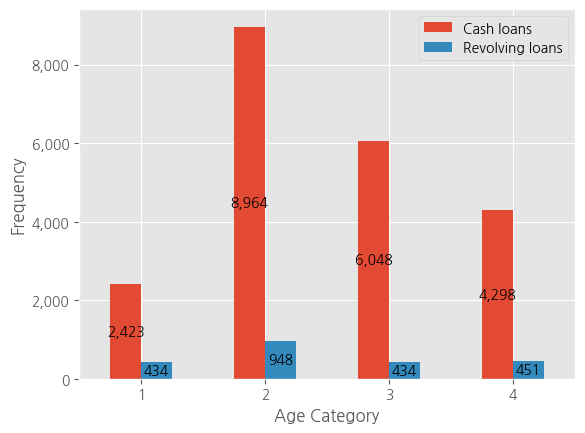

In [23]:
### 막대그래프 - 누적
tb = pd.crosstab(data_target.age_cat, 
                 data_target.NAME_CONTRACT_TYPE, 
                 colnames=[''])
ax = tb.plot.bar(rot=0, stacked = False)
ax.set_xlabel("Age Category")
ax.set_ylabel("Frequency")
ax.yaxis.set_major_formatter(mticker.FuncFormatter('{:,.0f}'.format))
for c in ax.containers:
    labels = [ x.get_height() for x in c ]
    ax.bar_label(c, fmt='{:,.0f}', label_type='center')

### Train / Test 데이터 분리

In [24]:
### data split
target = data_raw.TARGET
x_train, x_test, y_train, y_test = train_test_split(data_raw,
                                                      target, 
                                                      test_size=0.3,
                                                      random_state=34,
                                                      shuffle=True, stratify=target)
x_train_0 = x_train.loc[y_train==0, :]
x_train_1 = x_train.loc[y_train==1, :]

y_train_0 = y_train[y_train==0]
y_train_1 = y_train[y_train==1]
y_train_diff = len(y_train_0)-len(y_train_1)

#x_train_1.shape
x_train_up = resample(x_train_1, replace=True, n_samples=y_train_diff, random_state=5)
x_train = pd.concat([x_train_0, x_train_1, x_train_up])
y_train = pd.concat([y_train_0, y_train_1, pd.Series(np.repeat(1, y_train_diff))])

In [25]:
### Write csv - train
x_train.to_csv("data_train.csv", index=False)

In [26]:
### Write csv - test
x_test.to_csv("data_test.csv", index=False)

### Training

In [27]:
data_train = pd.read_csv("data_train.csv")
data_train.shape

(30810, 35)

In [28]:
data_train_model = fn_data_preprocessing(data_train)
data_train_model.shape

(30810, 18)

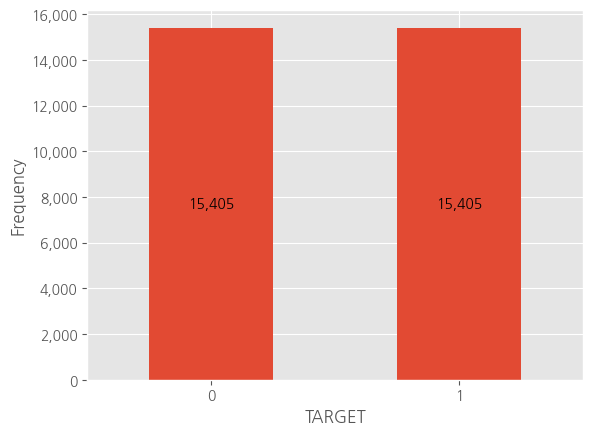

In [29]:
### TARGET
tb = pd.crosstab(data_train_model.TARGET, 'Freq', colnames=[''])
ax = tb.plot.bar(rot=0)
ax.bar_label(ax.containers[0], fmt='{:,.0f}', label_type='center')
ax.set_xlabel("TARGET")
ax.set_ylabel("Frequency")
ax.yaxis.set_major_formatter(mticker.FuncFormatter('{:,.0f}'.format))
ax.legend().remove()

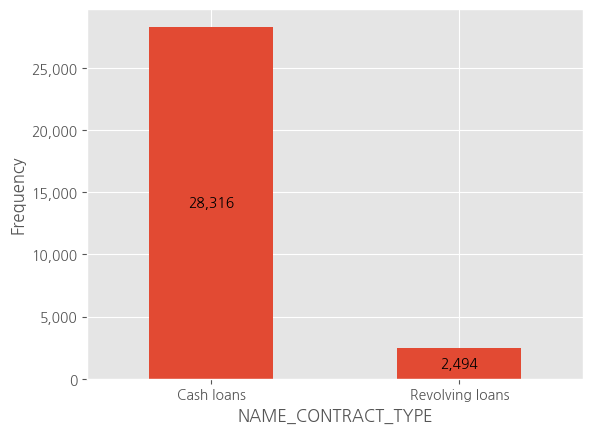

In [30]:
### NAME_CONTRACT_TYPE
tb = pd.crosstab(data_train_model.NAME_CONTRACT_TYPE, 'Freq', colnames=[''])
ax = tb.plot.bar(rot=0)
ax.bar_label(ax.containers[0], fmt='{:,.0f}', label_type='center')
ax.set_xlabel("NAME_CONTRACT_TYPE")
ax.set_ylabel("Frequency")
ax.yaxis.set_major_formatter(mticker.FuncFormatter('{:,.0f}'.format))
ax.legend().remove()

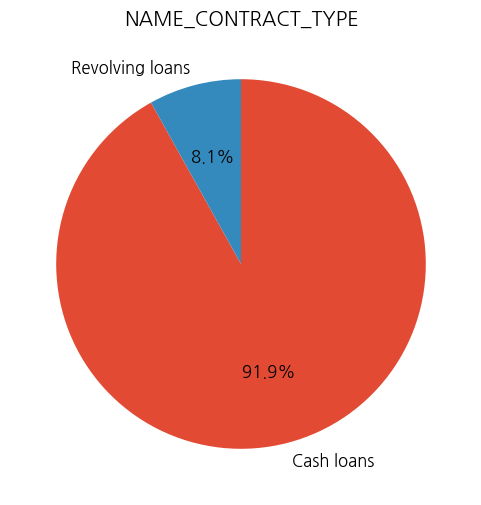

In [31]:
### NAME_CONTRACT_TYPE
tb_sort_asc = tb.sort_values('Freq', ascending=False)
ax = tb_sort_asc.plot.pie(y = 'Freq', figsize = (6, 6), fontsize = 12, 
                          startangle=90, counterclock = False,
                          autopct = '%.1f%%')
ax.set_title("NAME_CONTRACT_TYPE")
ax.legend().remove()
ax.set_ylabel("")
plt.show()

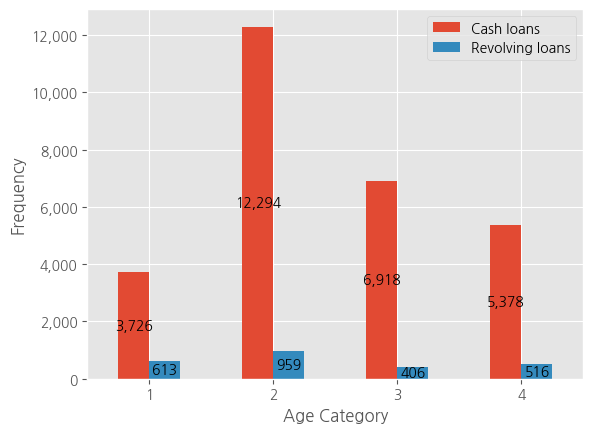

In [32]:
### 막대그래프 - 누적
tb = pd.crosstab(data_train_model.age_cat,
                 data_train_model.NAME_CONTRACT_TYPE, 
                 colnames=[''])
ax = tb.plot.bar(rot=0, stacked = False)
ax.set_xlabel("Age Category")
ax.set_ylabel("Frequency")
ax.yaxis.set_major_formatter(mticker.FuncFormatter('{:,.0f}'.format))
for c in ax.containers:
    labels = [ x.get_height() for x in c ]
    ax.bar_label(c, fmt='{:,.0f}', label_type='center')

### Logistic Regression - SEG

In [33]:
### 분석 자료 생성(변환)
data_train_model_d = pd.get_dummies(data_train_model, drop_first=True)
data_train_model_x = data_train_model_d.loc[:, data_train_model_d.columns!='TARGET']
data_train_model_y = data_train_model.TARGET

####### SEG - age_cat
model_list = list()
train_columns_drop = ['TARGET', 'age_cat', 'NAME_CONTRACT_TYPE_Revolving loans']
n = max(data_train_model['age_cat'])

for i in range(n):
    ### 분석 자료
    seg_condition = (data_train_model_x['age_cat']==i+1) & (data_train_model_x['NAME_CONTRACT_TYPE_Revolving loans']==0)
    seg_train_model_x = data_train_model_x.loc[seg_condition, data_train_model_x.columns.difference(train_columns_drop)]
    seg_train_model_y = data_train_model_y[seg_condition]
    
    ### 로지스틱 회귀모형 적합
    lm = LogisticRegression()
    model_seg = lm.fit(seg_train_model_x, seg_train_model_y)
    
    ### 로지스틱 회귀모형 저장
    model_list.append(model_seg)
    
####### SEG - Revolving loans
### 분석 자료
seg_condition = data_train_model_x['NAME_CONTRACT_TYPE_Revolving loans']==1
seg_train_model_x = data_train_model_x.loc[seg_condition, data_train_model_x.columns.difference(train_columns_drop)]
seg_train_model_y = data_train_model_y[seg_condition]

### 로지스틱 회귀모형 적합
lm = LogisticRegression()
model_seg = lm.fit(seg_train_model_x, seg_train_model_y)

### 로지스틱 회귀모형 저장
model_list.append(model_seg)

### Test

In [34]:
### Test - prediction result
def fn_prediction(data_file, model_list):
    ### Test data - raw format
    data_test = pd.read_csv("data_test.csv")
    
    ### 데이터 전처리
    data_test_model = fn_data_preprocessing(data_test)
    
    ### 분석 자료 - 전체
    data_test_model_d = pd.get_dummies(data_test_model, drop_first=True)
    data_test_model_x = data_test_model_d.loc[:, data_test_model_d.columns!='TARGET']
    data_test_model_y = data_test_model.TARGET
    
    ####### SEG - age_cat
    true_values = list()
    prob_values = list()

    for i in range(n):
        ### 분석 자료
        seg_condition = (data_train_model_x['age_cat']==i+1) & (data_train_model_x['NAME_CONTRACT_TYPE_Revolving loans']==0)
        seg_test_model_x = data_test_model_x.loc[seg_condition, data_train_model_x.columns.difference(train_columns_drop)]
        seg_test_model_y = data_test_model_y[seg_condition]

        ### Predict
        model_pred = model_list[i].predict(seg_test_model_x)
        #pd.crosstab(seg_test_model_y, model_pred)

        ### classification_report
        #print(classification_report(seg_test_model_y, model_pred))

        ### ROC curve
        y_test_fac, y_test_levels = pd.factorize(seg_test_model_y)
        ### decision_function() 또는 predict_proba()
        d_func = model_list[i].decision_function(seg_test_model_x)
        fpr, tpr, thresholds = roc_curve(y_test_fac, d_func)

        ### AUC
        if i==0: print("=== AUC by SEGs ===")
        print("SEG"+str(i+1), "AUC =", auc(fpr,tpr))

        ### Target values
        true_values.extend(seg_test_model_y)
        prob_values.extend(list(d_func))

    ####### SEG - Revolving loans
    i += 1
    seg_condition = data_train_model_x['NAME_CONTRACT_TYPE_Revolving loans']==1
    seg_test_model_x = data_test_model_x.loc[seg_condition, data_train_model_x.columns.difference(train_columns_drop)]
    seg_test_model_y = data_test_model_y[seg_condition]

    ### Predict
    model_pred = model_list[i].predict(seg_test_model_x)
    #pd.crosstab(seg_test_model_y, model_pred)

    ### classification_report
    #print(classification_report(seg_test_model_y, model_pred))

    ### ROC curve
    y_test_fac, y_test_levels = pd.factorize(seg_test_model_y)
    ### decision_function() 또는 predict_proba()
    d_func = model_list[i].decision_function(seg_test_model_x)
    fpr, tpr, thresholds = roc_curve(y_test_fac, d_func)

    ### AUC
    print("SEG"+str(i+1), "AUC =", auc(fpr,tpr))

    ### Target values
    true_values.extend(seg_test_model_y)
    prob_values.extend(list(d_func))
    
    ### Prediction result
    ## ROC curve
    y_test_fac, y_test_levels = pd.factorize(true_values)
    ### decision_function() 또는 predict_proba()
    d_func = prob_values
    fpr, tpr, thresholds = roc_curve(y_test_fac, d_func)
    
    ### AUC
    print("\n=== ROC curve & AUC ===")
    print("Test AUC =", auc(fpr,tpr))
    
    ### ROC curve
    plt.plot(fpr, tpr, 'o-')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.show()



=== AUC by SEGs ===
SEG1 AUC = 0.6232840197254432
SEG2 AUC = 0.6459312638580932
SEG3 AUC = 0.645443906178639
SEG4 AUC = 0.672469695842939
SEG5 AUC = 0.6486067297581493

=== ROC curve & AUC ===
Test AUC = 0.6474089639401863


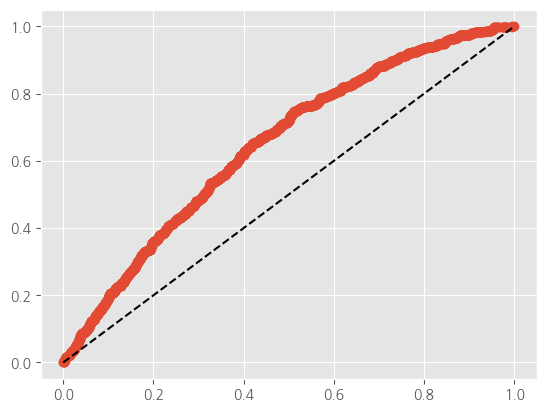

In [35]:
### Prediction
fn_prediction("data_test.csv", model_list)